Found 36 matching cluster pairs


NameError: name 'mcolors' is not defined

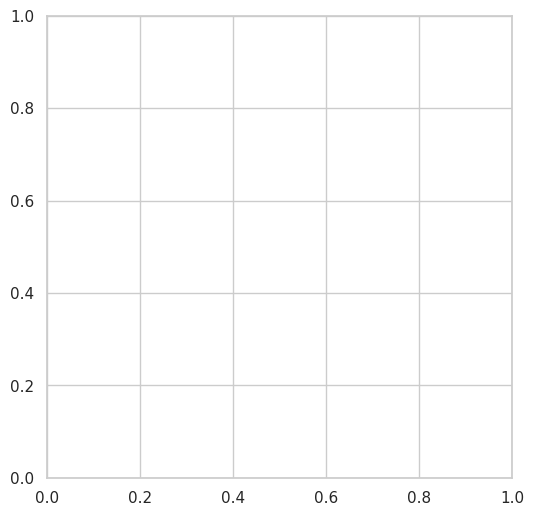

In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# %%
# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")  # change this
ds_pattern = re.compile(r"DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
de_pattern = re.compile(r"DEsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

# %%
# === COLLECT FILES ===
ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
             if (m := ds_pattern.search(f.name))}
de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
             if (m := de_pattern.search(f.name))}

pairs = sorted(set(ds_files) & set(de_files))
print(f"Found {len(pairs)} matching cluster pairs")

# %%
records = []
for pair in pairs:
    ds_df = pd.read_csv(ds_files[pair])
    de_df = pd.read_csv(de_files[pair], index_col=0)

    n_ds = len(ds_df)
    n_de = len(de_df)

    # list of gene names (keep duplicates)
    ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
    # overlap percentage
    overlap_genes = [g for g in ds_gene_list if g in de_df.index]
    pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

    records.append({
        "pair": f"{pair[0]} vs {pair[1]}",
        "n_ds": n_ds,
        "n_de": n_de,
        "pct_overlap": pct_overlap
    })

summary = pd.DataFrame(records)
summary.head()

# %%
# === PLOT ===
sns.set(style="whitegrid", context="notebook")
fig, ax = plt.subplots(figsize=(6,6))
norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=100)

import matplotlib.colors as mcolors

sc = ax.scatter(
    summary["n_ds"], summary["n_de"],
    c=summary["pct_overlap"], cmap="magma_r", s=200, edgecolor="k", alpha = 0.75,
    norm=norm
)

for _, row in summary.iterrows():
    ax.text(row["n_ds"] + 10, row["n_de"] + 10, row["pair"], ha="left", va="bottom", fontsize=9)



cb = plt.colorbar(sc, ax=ax)
cb.set_label("% junction–gene overlap")
cb.set_ticks([0, 20, 40, 60, 80, 100])


ax.set_xlabel("# sig diff spliced junctions")
ax.set_ylabel("# sig diff expressed genes")

sns.despine()

plt.tight_layout()
plt.show()

# %%
# Optionally save summary table and figure
summary.to_csv(base_dir / "splicevi_summary.csv", index=False)
fig.savefig(base_dir / "splicevi_diffscatter.png", dpi=300, bbox_inches="tight")


Found 28 matching cluster pairs


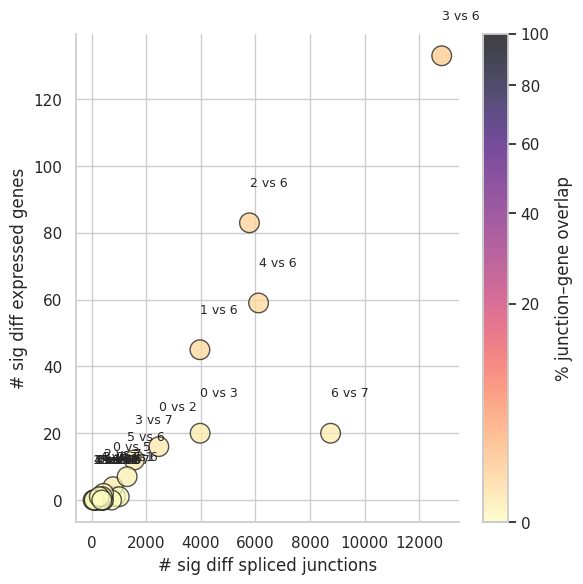

In [24]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# %%
# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")  # change this
ds_pattern = re.compile(r"DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
de_pattern = re.compile(r"DEsig_splicevi_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

# %%
# === COLLECT FILES ===
ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
             if (m := ds_pattern.search(f.name))}
de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
             if (m := de_pattern.search(f.name))}

pairs = sorted(set(ds_files) & set(de_files))
print(f"Found {len(pairs)} matching cluster pairs")

# %%
records = []
for pair in pairs:
    ds_df = pd.read_csv(ds_files[pair])
    de_df = pd.read_csv(de_files[pair], index_col=0)

    n_ds = len(ds_df)
    n_de = len(de_df)

    # list of gene names (keep duplicates)
    ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
    # overlap percentage
    overlap_genes = [g for g in ds_gene_list if g in de_df.index]
    pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

    records.append({
        "pair": f"{pair[0]} vs {pair[1]}",
        "n_ds": n_ds,
        "n_de": n_de,
        "pct_overlap": pct_overlap
    })

summary = pd.DataFrame(records)
summary.head()

# %%
# === PLOT ===
sns.set(style="whitegrid", context="notebook")
fig, ax = plt.subplots(figsize=(6,6))
norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=100)

import matplotlib.colors as mcolors

sc = ax.scatter(
    summary["n_ds"], summary["n_de"],
    c=summary["pct_overlap"], cmap="magma_r", s=200, edgecolor="k", alpha = 0.75,
    norm=norm
)

for _, row in summary.iterrows():
    ax.text(row["n_ds"] + 10, row["n_de"] + 10, row["pair"], ha="left", va="bottom", fontsize=9)



cb = plt.colorbar(sc, ax=ax)
cb.set_label("% junction–gene overlap")
cb.set_ticks([0, 20, 40, 60, 80, 100])


ax.set_xlabel("# sig diff spliced junctions")
ax.set_ylabel("# sig diff expressed genes")

sns.despine()

plt.tight_layout()
plt.show()

# %%
# Optionally save summary table and figure
summary.to_csv(base_dir / "splicevi_summary.csv", index=False)
fig.savefig(base_dir / "splicevi_diffscatter.png", dpi=300, bbox_inches="tight")


Found 15 matching cluster pairs for pattern DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv
len dsdf before 544
len dsdf before 418
len dsdf before 32
len dsdf before 23
len dsdf before 3
len dsdf before 3
len dsdf before 16
len dsdf before 12
len dsdf before 2689
len dsdf before 1841
len dsdf before 2768
len dsdf before 2069
len dsdf before 107
len dsdf before 80
len dsdf before 82
len dsdf before 56
len dsdf before 603
len dsdf before 379
len dsdf before 144
len dsdf before 103
len dsdf before 52
len dsdf before 33
len dsdf before 11025
len dsdf before 7875
len dsdf before 7
len dsdf before 5
len dsdf before 525
len dsdf before 363
len dsdf before 4629
len dsdf before 3006
Found 10 matching cluster pairs for pattern DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv
len dsdf before 1
len dsdf before 1
len dsdf before 639
len dsdf before 490
len dsdf before 3
len dsdf before 2
len dsdf before 2486
len dsdf before 1671
len dsdf before 343
len dsdf before 250
len dsdf 

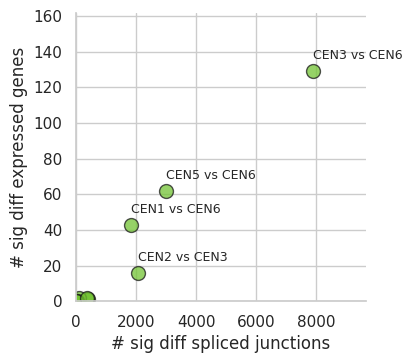

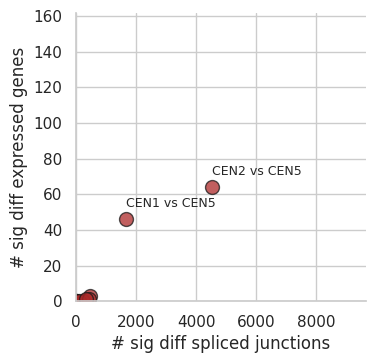

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from pathlib import Path
import re

# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251113_115152__MVISP_models__SCVI_model")

def collect_summary(ds_pattern, de_pattern):
    ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
                 if (m := ds_pattern.search(f.name))}
    de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
                 if (m := de_pattern.search(f.name))}

    pairs = sorted(set(ds_files) & set(de_files))
    print(f"Found {len(pairs)} matching cluster pairs for pattern {ds_pattern.pattern}")

    records = []
    for pair in pairs:
        ds_df = pd.read_csv(ds_files[pair])
        de_df = pd.read_csv(de_files[pair], index_col=0)

        print(f"len dsdf before {len(ds_df)}")

        if {"emp_prob1", "emp_prob2"}.issubset(ds_df.columns):
            valid_mask = (ds_df["emp_prob1"] != -1.0) & (ds_df["emp_prob2"] != -1.0)
            ds_df = ds_df[valid_mask].copy()


        n_ds = len(ds_df)
        n_de = len(de_df)

        print(f"len dsdf before {len(ds_df)}")
        ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
        overlap_genes = [g for g in ds_gene_list if g in de_df.index]
        pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

        records.append({
            "pair": f"CEN{int(pair[0])+1} vs CEN{int(pair[1])+1}",
            "n_ds": n_ds,
            "n_de": n_de,
            "pct_overlap": pct_overlap
        })
    return pd.DataFrame(records)


# === Collect both datasets ===
splicevi_ds_pattern = re.compile(r"DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
splicevi_de_pattern = re.compile(r"DEsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
scvi_ds_pattern = re.compile(r"DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
scvi_de_pattern = re.compile(r"DEsig_splicevi_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

summary_splicevi = collect_summary(splicevi_ds_pattern, splicevi_de_pattern)
summary_scvi = collect_summary(scvi_ds_pattern, scvi_de_pattern)

# === Shared axis limits ===
xmax = max(summary_splicevi["n_ds"].max(), summary_scvi["n_ds"].max()) * 1.1
# Shared x-tick locations (modify spacing to taste)
xticks = list(range(0, int(xmax+1000), 2000))


ymax = max(summary_splicevi["n_de"].max(), summary_scvi["n_de"].max()) * 1.1


# === Plot function ===
def make_plot(summary, title, save_name):
    sns.set(style="whitegrid", context="notebook")
    fig, ax = plt.subplots(figsize=(3.75,3.75))
    

    color_p = "#73c434" if "Splice" in title else "#ad2a2a"
    sc = ax.scatter(
        summary["n_ds"], summary["n_de"], color = color_p, 
        s=100, edgecolor="k", alpha=0.75,
    )

    for _, row in summary.iterrows():
        if row["n_de"] >= 15:
            ax.text(row["n_ds"] + 5, row["n_de"] + 5, row["pair"],
                    ha="left", va="bottom", fontsize=9)

    sc.set_clim(0, 1.2)

    ax.set_xlim(0, xmax+1000)
    ax.set_ylim(0, ymax+20)
    ax.set_xticks(xticks)
    ax.set_xlabel("# sig diff spliced junctions")
    ax.set_ylabel("# sig diff expressed genes")

    
    ax.set_title(title)

    sns.despine()
    plt.show()

    fig.savefig(base_dir / save_name, dpi=300, bbox_inches="tight")


# === Generate both plots ===
make_plot(summary_splicevi, "SpliceVI CEN Leiden clusters", "splicevi_diffscatter.pdf")
make_plot(summary_scvi, "scVI CEN Leiden clusters", "scvi_diffscatter.pdf")


chrX_71376910_71383199_+
chrX_71369904_71376886_+
chr12_111810995_111813824_-
chr11_67596699_67603107_+
chr9_112182820_112183494_-
chr17_43953537_44017766_+
chr5_118056438_118056536_+
chr3_88629563_88629786_+
chr8_22381007_22383206_-
chr1_74557872_74560289_+
chr14_23442079_23449199_-
chr19_41982008_42031888_+


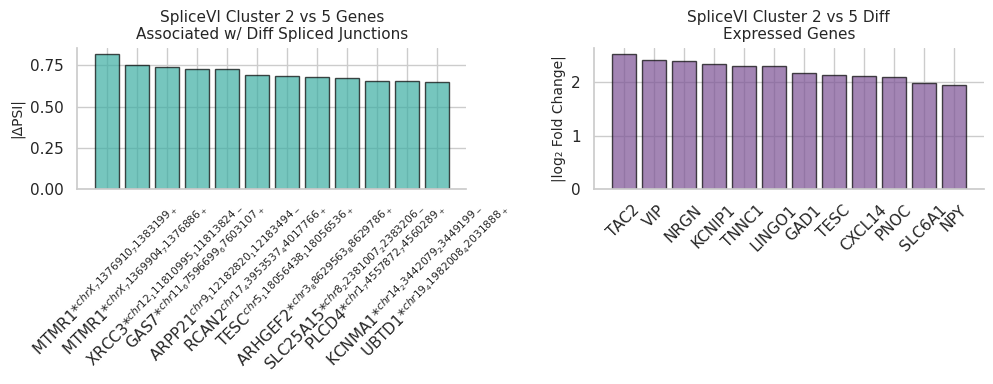

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251113_115152__MVISP_models__SCVI_model")
pair = ("2", "5")        # <-- change this to whichever clusters you want
top_n = 12               # number of top genes/junctions to plot

# === Load data ===
ds_file = base_dir / f"DSsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"
de_file = base_dir / f"DEsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"

ds_df = pd.read_csv(ds_file)


if {"emp_prob1", "emp_prob2"}.issubset(ds_df.columns):
    valid_mask = (ds_df["emp_prob1"] != -1.0) & (ds_df["emp_prob2"] != -1.0)
    ds_df = ds_df[valid_mask].copy()
    

de_df = pd.read_csv(de_file, index_col=0)

# === Compute absolute effect magnitudes ===
if "effect_size" in ds_df.columns:
    ds_df["abs_effect"] = ds_df["effect_size"].abs()
else:
    # fallback if effect_size doesn't exist — use |scale2 - scale1|
    ds_df["abs_effect"] = (ds_df["scale2"] - ds_df["scale1"]).abs()

de_df["abs_effect"] = de_df["lfc_mean"].abs()

# === Sort and select top N spliced junctions / expressed genes ===
ds_top = ds_df.sort_values("abs_effect", ascending=False).head(top_n)
de_top = de_df.sort_values("abs_effect", ascending=False).head(top_n)

# === Get all DE gene names (not just top N) ===
all_de_genes = set(de_df.index.astype(str))

# === Annotate DS genes with stars if NOT DE ===
ds_top = ds_top.rename(columns={"gene_name": "gene"})
ds_top["gene"] = ds_top["gene"].astype(str)
def make_label(gene, junction_id):
    star = "*" if gene not in all_de_genes else ""
    short_id = junction_id
    print(short_id)
    return rf"{gene}{star}$^{{{short_id}}}$"

ds_top["gene_label"] = ds_top.apply(
    lambda r: make_label(str(r["gene"]), str(r["junction_id"])), axis=1
)


de_top["gene"] = de_top.index.astype(str)

# === Plot ===
sns.set(style="whitegrid", context="notebook")
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# Left: Differential splicing
axes[0].bar(
    ds_top["gene_label"],
    ds_top["abs_effect"],
    color="#3CAEA3", edgecolor="black", alpha=0.7
)
axes[0].set_title(f"SpliceVI Cluster {pair[0]} vs {pair[1]} Genes\nAssociated w/ Diff Spliced Junctions", fontsize=11)
axes[0].set_ylabel("|ΔPSI|", fontsize=10)
axes[0].tick_params(axis="x", rotation=45)

# Right: Differential expression
axes[1].bar(
    de_top["gene"],
    de_top["abs_effect"],
    color="#7C5295", edgecolor="black", alpha=0.7
)
axes[1].set_title(f"SpliceVI Cluster {pair[0]} vs {pair[1]} Diff\nExpressed Genes", fontsize=11)
axes[1].set_ylabel("|log₂ Fold Change|", fontsize=10)
axes[1].tick_params(axis="x", rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

# Optional save
fig.savefig(base_dir / f"barplot_pair_{pair[0]}_vs_{pair[1]}.png", dpi=300, bbox_inches="tight")



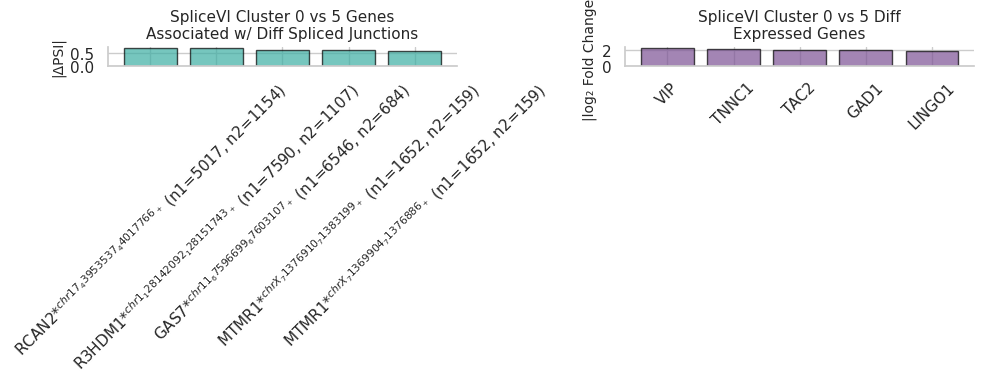

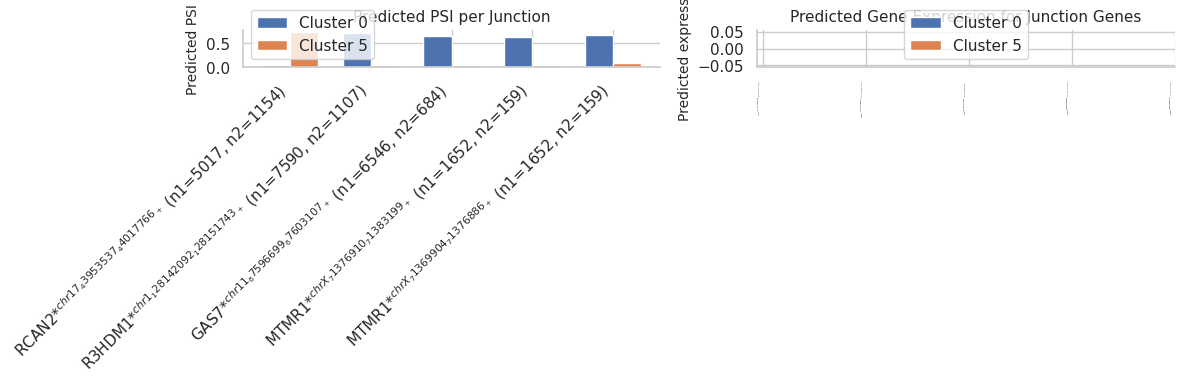

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251113_115152__MVISP_models__SCVI_model")
pair = ("2", "5")        # <-- change this to whichever clusters you want
top_n = 5               # number of top genes/junctions to plot

# === Load data ===
ds_file = base_dir / f"DSsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"
de_file = base_dir / f"DEsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"

ds_df = pd.read_csv(ds_file)

if {"emp_prob1", "emp_prob2"}.issubset(ds_df.columns):
    valid_mask = (ds_df["emp_prob1"] != -1.0) & (ds_df["emp_prob2"] != -1.0)
    ds_df = ds_df[valid_mask].copy()

de_df = pd.read_csv(de_file, index_col=0)

# === Compute absolute effect magnitudes ===
if "effect_size" in ds_df.columns:
    ds_df["abs_effect"] = ds_df["effect_size"].abs()
else:
    # fallback if effect_size does not exist, use |scale2 - scale1|
    ds_df["abs_effect"] = (ds_df["scale2"] - ds_df["scale1"]).abs()

de_df["abs_effect"] = de_df["lfc_mean"].abs()

# === Sort and select top N spliced junctions / expressed genes ===
ds_top = ds_df.sort_values("abs_effect", ascending=False).head(top_n)
de_top = de_df.sort_values("abs_effect", ascending=False).head(top_n)

# === Get all DE gene names (not just top N) ===
all_de_genes = set(de_df.index.astype(str))

# === Annotate DS genes with stars if NOT DE ===
ds_top = ds_top.rename(columns={"gene_name": "gene"})
ds_top["gene"] = ds_top["gene"].astype(str)

def make_label(gene, junction_id, n1, n2):
    star = "*" if gene not in all_de_genes else ""
    return rf"{gene}{star}$^{{{junction_id}}}$ (n1={n1}, n2={n2})"


ds_top["gene_label"] = ds_top.apply(
    lambda r: make_label(
        str(r["gene"]),
        str(r["junction_id"]),
        int(r["n_obs_group1"]),
        int(r["n_obs_group2"]),
    ),
    axis=1,
)


de_top["gene"] = de_top.index.astype(str)

# === Figure 1: effect size barplots (unchanged) ===
sns.set(style="whitegrid", context="notebook")
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# Left: Differential splicing
axes[0].bar(
    ds_top["gene_label"],
    ds_top["abs_effect"],
    color="#3CAEA3", edgecolor="black", alpha=0.7
)
axes[0].set_title(
    f"SpliceVI Cluster {pair[0]} vs {pair[1]} Genes\nAssociated w/ Diff Spliced Junctions",
    fontsize=11,
)
axes[0].set_ylabel("|ΔPSI|", fontsize=10)
axes[0].tick_params(axis="x", rotation=45)

# Right: Differential expression
axes[1].bar(
    de_top["gene"],
    de_top["abs_effect"],
    color="#7C5295", edgecolor="black", alpha=0.7
)
axes[1].set_title(
    f"SpliceVI Cluster {pair[0]} vs {pair[1]} Diff\nExpressed Genes",
    fontsize=11,
)
axes[1].set_ylabel("|log₂ Fold Change|", fontsize=10)
axes[1].tick_params(axis="x", rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

fig.savefig(base_dir / f"barplot_pair_{pair[0]}_vs_{pair[1]}.png", dpi=300, bbox_inches="tight")

# =====================================================================
# Figure 2: predicted PSI and predicted expression for each junction
# in ds_top, for both groups
# =====================================================================

# --- Check and resolve DE predicted expression column names ---
if {"scale1", "scale2"}.issubset(de_df.columns):
    de_scale1_col, de_scale2_col = "scale1", "scale2"
elif {"scale_1", "scale_2"}.issubset(de_df.columns):
    de_scale1_col, de_scale2_col = "scale_1", "scale_2"
else:
    raise ValueError(
        "Could not find DE predicted expression columns. "
        "Expected either ['scale1', 'scale2'] or ['scale_1', 'scale_2'] in de_df."
    )

# --- Check DS predicted PSI columns ---
if not {"est_prob1", "est_prob2"}.issubset(ds_top.columns):
    raise ValueError(
        "Expected 'est_prob1' and 'est_prob2' in ds_df for predicted PSI."
    )

# --- Align DE predictions to the DS junctions by gene ---
# This merges gene-level predicted expression onto each DS junction
de_subset = de_df[[de_scale1_col, de_scale2_col]].copy()
de_subset.index = de_subset.index.astype(str)

ds_with_expr = ds_top.merge(
    de_subset,
    left_on="gene",
    right_index=True,
    how="left",
)

# Warn if some genes did not have DE entries
missing_expr = ds_with_expr[de_scale1_col].isna().sum()
if missing_expr > 0:
    print(f"Warning: {missing_expr} DS junctions have no matching DE gene for predicted expression.")

# === Plot grouped bars for each junction ===
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4), sharey=False)
x = np.arange(len(ds_with_expr))
width = 0.35

# Left panel: predicted PSI (est_prob1 vs est_prob2)
axes2[0].bar(
    x - width / 2,
    ds_with_expr["est_prob1"],
    width,
    label=f"Cluster {pair[0]}",
)
axes2[0].bar(
    x + width / 2,
    ds_with_expr["est_prob2"],
    width,
    label=f"Cluster {pair[1]}",
)
axes2[0].set_xticks(x)
axes2[0].set_xticklabels(ds_with_expr["gene_label"], rotation=45, ha="right")
axes2[0].set_ylabel("Predicted PSI", fontsize=10)
axes2[0].set_title("Predicted PSI per Junction", fontsize=11)
axes2[0].legend()

# Right panel: predicted expression (scale1/scale2) for the gene
axes2[1].bar(
    x - width / 2,
    ds_with_expr[de_scale1_col],
    width,
    label=f"Cluster {pair[0]}",
)
axes2[1].bar(
    x + width / 2,
    ds_with_expr[de_scale2_col],
    width,
    label=f"Cluster {pair[1]}",
)
axes2[1].set_xticks(x)
axes2[1].set_xticklabels(ds_with_expr["gene_label"], rotation=90, ha="right", fontsize =1)
axes2[1].set_ylabel("Predicted expression", fontsize=10)
axes2[1].set_title("Predicted Gene Expression for Junction Genes", fontsize=11)
axes2[1].legend()

sns.despine()
plt.tight_layout()
plt.show()

fig2.savefig(
    base_dir / f"predicted_psi_expr_pair_{pair[0]}_vs_{pair[1]}.png",
    dpi=300,
    bbox_inches="tight",
)


Differentially spliced junction counts per gene (across DS table):
gene
PLCD4       9
XRCC3       6
ARHGEF2     4
MTMR1       4
ARPP21      3
GAS7        3
RCAN2       3
KCNMA1      2
SLC25A15    1
TESC        1
UBTD1       1


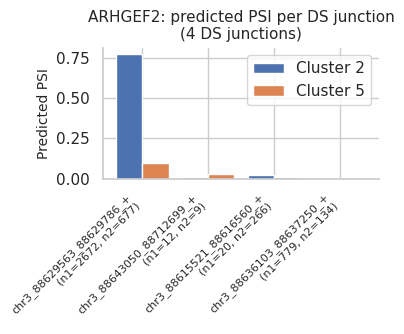

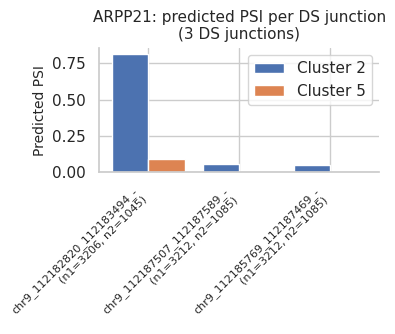

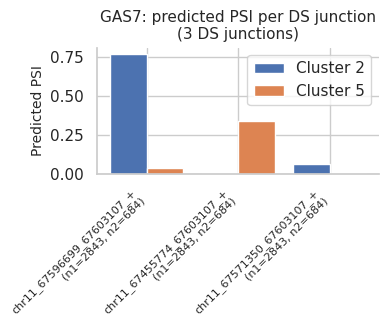

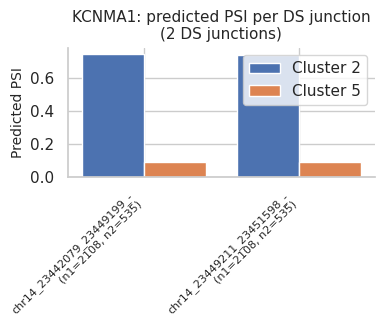

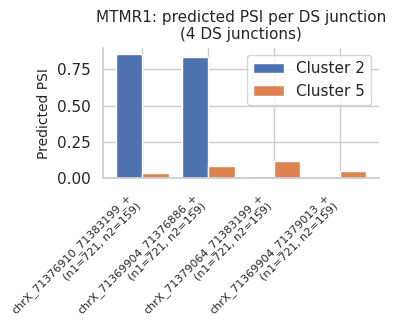

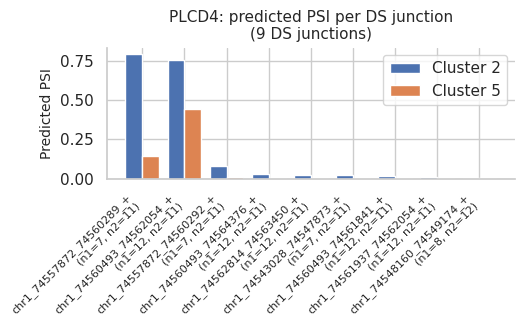

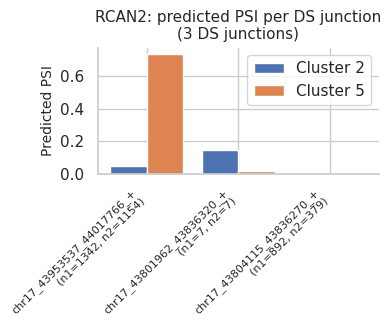

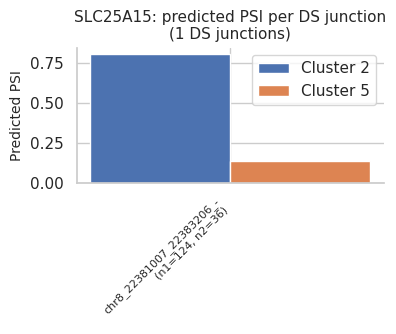

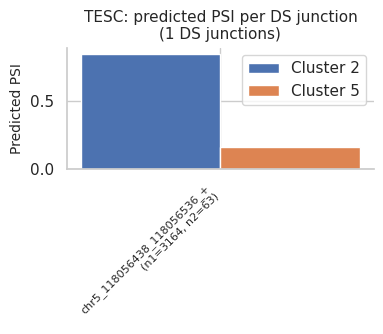

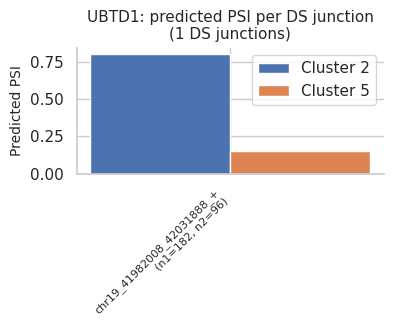

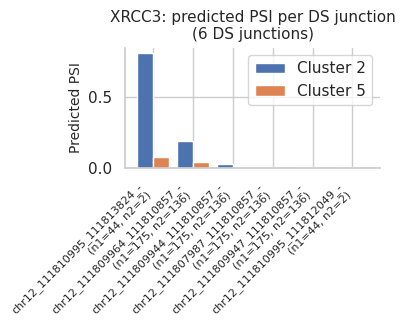

In [24]:
# === New cell: per-gene DS junction counts and PSI barplots ===

# Make sure ds_df, ds_top, base_dir, pair are already defined from previous cell

# Use a clean 'gene' column on the full DS table
if "gene" not in ds_df.columns and "gene_name" in ds_df.columns:
    ds_df_gene = ds_df.rename(columns={"gene_name": "gene"}).copy()
else:
    ds_df_gene = ds_df.copy()

ds_df_gene["gene"] = ds_df_gene["gene"].astype(str)

# Genes associated with the top-N DS junctions
genes_of_interest = ds_top["gene"].unique()

# 1) Count total DS junctions per gene across the full DS table
gene_counts = (
    ds_df_gene[ds_df_gene["gene"].isin(genes_of_interest)]
    .groupby("gene")["junction_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("Differentially spliced junction counts per gene (across DS table):")
print(gene_counts.to_string())

# 2) Per-gene PSI plots for each junction in that gene
width = 0.4  # bar width

for gene, sub in ds_df_gene[ds_df_gene["gene"].isin(genes_of_interest)].groupby("gene"):
    # Optional: sort junctions by absolute effect if available
    if "abs_effect" in sub.columns:
        sub = sub.sort_values("abs_effect", ascending=False)
    else:
        sub = sub.sort_values("junction_id")

    # Require PSI columns
    if not {"est_prob1", "est_prob2"}.issubset(sub.columns):
        print(f"Skipping {gene}: missing est_prob1/est_prob2")
        continue

    x = np.arange(len(sub))

    fig, ax = plt.subplots(
        figsize=(max(4, len(sub) * 0.6), 3.5)
    )

    # Bars for each junction
    ax.bar(
        x - width / 2,
        sub["est_prob1"],
        width,
        label=f"Cluster {pair[0]}",
    )
    ax.bar(
        x + width / 2,
        sub["est_prob2"],
        width,
        label=f"Cluster {pair[1]}",
    )

    # X tick labels: junction_id + n_obs_group1/2
    if {"n_obs_group1", "n_obs_group2"}.issubset(sub.columns):
        xticklabels = [
            f"{jid}\n(n1={n1}, n2={n2})"
            for jid, n1, n2 in zip(
                sub["junction_id"],
                sub["n_obs_group1"],
                sub["n_obs_group2"],
            )
        ]
    else:
        xticklabels = sub["junction_id"].astype(str).tolist()

    ax.set_xticks(x)
    ax.set_xticklabels(xticklabels, rotation=45, ha="right", fontsize=8)

    ax.set_ylabel("Predicted PSI", fontsize=10)
    ax.set_title(
        f"{gene}: predicted PSI per DS junction\n({len(sub)} DS junctions)",
        fontsize=11,
    )
    ax.legend()

    sns.despine()
    plt.tight_layout()
    plt.show()

    # Save one figure per gene
    fig.savefig(
        base_dir / f"psi_by_junction_{gene}_pair_{pair[0]}_vs_{pair[1]}.png",
        dpi=300,
        bbox_inches="tight",
    )
